In [ ]:
# binance-api
# libraries installed
# required public and private keys
# data is imported into pandas data frame = "data"


In [98]:
!pip install python-binance
# This code has been uploaded into BlockchainAssets Github
# data variable contains the data from the dowloading, DataFrame (pandas)
import pandas as pd
import math
import os.path
import time
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

api_key = '#####'
api_secret = '#####'

binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750
binance_client = Client(api_key=api_key, api_secret=api_secret)

def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime('1 Jan 2017', '%d %b %Y')
    elif source == "bitmex": old = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=False).result()[0][0]['timestamp']
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    if source == "bitmex": new = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=True).result()[0][0]['timestamp']
    return old, new

def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2017', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

# Values available = "1m", "5m", "1h", "1d"
binance_symbols = ["BTCUSDT"]
for symbol in binance_symbols:
    data = get_all_binance(symbol, '1d', save = False)

for name in data.columns:
  if name!='open':
    data.drop(name, axis=1, inplace=True)

data = data.astype(dtype='float32')

All caught up..!


In [91]:
# eth price
binance_symbols_eth = ["ETHUSD"]
for symbol in binance_symbols:
    data_eth = get_all_binance(symbol, '1d', save = False)

#for name in data_eth.columns:
  #if name!='open':
    #data_eth.drop(name, axis=1, inplace=True)

data_eth = data_eth.astype(dtype='float32')

data_eth

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17,4261.479980,4485.390137,4200.740234,4285.080078,795.150391,1.503014e+12,3.454770e+06,3427.0,616.248535,2.678216e+06,8733.911133
2017-08-18,4285.080078,4371.520020,3938.770020,4108.370117,1199.888306,1.503101e+12,5.086958e+06,5233.0,972.868713,4.129123e+06,9384.141602
2017-08-19,4108.370117,4184.689941,3850.000000,4139.979980,381.309753,1.503187e+12,1.549484e+06,2153.0,274.336029,1.118002e+06,9184.085938
2017-08-20,4120.979980,4211.080078,4032.620117,4086.290039,467.083008,1.503274e+12,1.930364e+06,2321.0,376.795959,1.557401e+06,10125.414062
2017-08-21,4069.129883,4119.620117,3911.790039,4016.000000,691.743042,1.503360e+12,2.797232e+06,3972.0,557.356079,2.255662e+06,11706.769531
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 00:00:00,7119.600098,7132.520020,7042.490234,7091.209961,14926.035156,1.576541e+12,1.056792e+08,134262.0,7566.988770,5.358085e+07,0.000000
2019-12-16 00:00:00,7119.600098,7132.520020,7042.490234,7091.209961,14926.035156,1.576541e+12,1.056792e+08,134262.0,7566.988770,5.358085e+07,0.000000
2019-12-16 00:00:00,7119.600098,7132.520020,7042.490234,7090.770020,14934.376953,1.576541e+12,1.057383e+08,134369.0,7571.591309,5.361349e+07,0.000000


['BTCUSDT']


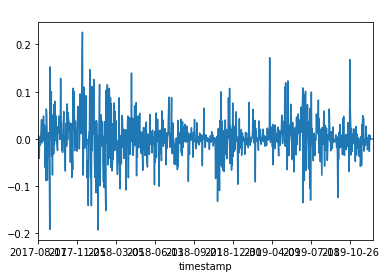

In [70]:
import numpy as np 
from scipy.stats import skew
from scipy import stats
import statsmodels.formula.api as smf
from scipy.stats import norm

#data.head()
#data.tail()
#print(data)
print(binance_symbols)
#type(data)
type(data)
btc_usd = data
#print(btc_usd)
btc_usd.head(5)
btc_usd['Returns'] = btc_usd['open'].pct_change()
btc_usd.tail(10)
btc_usd['Returns'].plot()
plt.title('btc returns %', color="white")
plt.show()
#cant deploy this code
#btc_usd['Returns BTC'] = btc_usd['Adj Close'].pct_change()
#StocksReturns_Percent['btc_percent_return'] = btc_usd['Returns BTC']*100
#cumulative_btc = StocksReturns_Percent['btc_percent_return'].cumsum()

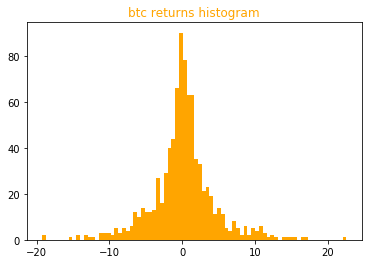

In [66]:
returns_percent = btc_usd['Returns']*100
returns_percent
return_plot = returns_percent.dropna()
plt.hist(return_plot, bins=80, color="orange")
plt.title('btc returns histogram', color="orange")
plt.show()

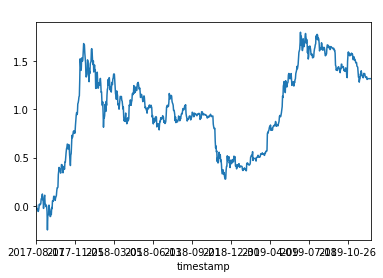

In [72]:
cummulative_btc = btc_usd['Returns'].cumsum()
cummulative_btc.plot()
plt.title('btc cummulative % returns', color='white')
plt.show()


In [103]:
def update_base_quote(base, quote = 'USDT'):
    for token in base:
        get_all_binance(quote, '1d', save = False)


In [95]:
def open_prices(base, quote):
    complete_data = {}
    for ticker in base:
        complete_data[ticker+quote] = pd.read_csv(ticker+quote+'-1d-data.csv')[['timestamp', 'open']]
        complete_data[ticker+quote].rename(columns = {'open':ticker+quote}, inplace=True)
    
    open_price_data = complete_data[base[0] + quote][['timestamp']]
    for ticker in base:
        open_price_data = pd.merge(open_price_data, complete_data[ticker+quote], how='inner', on='timestamp')    
    
    return open_price_data[~open_price_data.timestamp.duplicated(keep='first')]


In [115]:
def portfolio_value(base, quote, holdings):
    prices = open_prices(base, quote)
    portfolio_value = prices[base[0]+quote]*holdings[0]
    for i in range(1,len(base)):
        portfolio_value = portfolio_value + prices[base[i]+quote]*holdings[i]
    return pd.DataFrame(data={'Value':portfolio_value.values}, index=prices['timestamp'].values)

In [116]:
base = ['ATOM']
quote = 'USDT'
base

['ATOM']

In [117]:
#update_base_quote(base, quote)
#error !!!!

In [188]:
var_95 = np.nanpercentile(btc_usd,5)
var_95
cvar_95 = btc_usd[btc_usd <= var_95].mean()
cvar_95

open            NaN
Returns   -0.078469
dtype: float32

In [302]:
#columns = btc_usd.columns
#btc_open = btc_usd.loc[:,['open']]
btc_open
returns_percent
btc_open = btc_usd['open']
btc_open

timestamp
2017-08-17             4261.479980
2017-08-18             4285.080078
2017-08-19             4108.370117
2017-08-20             4120.979980
2017-08-21             4069.129883
                          ...     
2019-12-16 00:00:00    7119.600098
2019-12-16 00:00:00    7119.600098
2019-12-16 00:00:00    7119.600098
2019-12-16 00:00:00    7119.600098
2019-12-16 00:00:00    7119.600098
Name: open, Length: 861, dtype: float32

In [307]:
mu = np.mean(returns_percent)
print("this is the average:",mu,"%")
std = np.std(returns_percent)
print("this is the standard deviation:",std,"%")
confidence_level = 0.05
Var = norm.ppf(confidence_level,mu, std)


forecast_days =30
forecast_var95_5day = var_95*np.sqrt(forecast_days)
forecast_var95_5day

this is the average: 0.1531250774860382 %
this is the standard deviation: 4.322876453399658 %


-0.25818630542474275

In [269]:
btc_open.head(5)

,open
timestamp,
2017-08-17,4261.479980
2017-08-18,4285.080078
2017-08-19,4108.370117
2017-08-20,4120.979980
2017-08-21,4069.129883


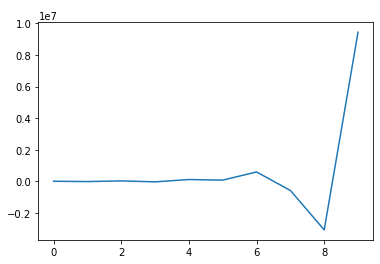

In [320]:
#random walks
mu
std
t = 10
s0 = 4261 #starting stock price
random_returns = np.random.normal(mu,std,t)+1
forecasted_values = s0*random_returns.cumprod()
plt.plot(range(0,t), forecasted_values)
plt.title('Random Walk BTC', color='white')
plt.show()

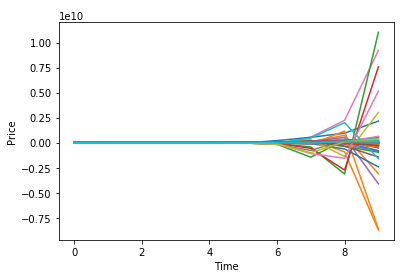

In [328]:
for i in range(100):
    rand_rets = np.random.normal(mu, std,t)+1
    forecasted_values = s0*(rand_rets).cumprod()
    
    plt.plot(range(t), forecasted_values)
    plt.title('Montecarlo simulation BTC', color='white')
    plt.xlabel('Time')
    plt.ylabel('Price')
plt.show()


    

In [330]:

# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(btc_open) 
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

1.121595936301242
4.121595936301242


In [331]:

# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(btc_open)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: (0.9413124322891235, 6.011607066442421e-18)
P-value:  6.011607066442421e-18


In [336]:

# Volatility 
btc_std = np.std(returns_percent)
btc_var = np.std(returns_percent)**2
btc_annual_volatility = np.std(returns_percent)*np.sqrt(365)
print('btc vol is:',btc_std)
print('btc variance is:',btc_var)
print('btc annual vol is:',btc_annual_volatility)


btc vol is: 4.322876453399658
btc variance is: 18.687260831357207
btc annual vol is: 82.58843867906319
